In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import xgboost
import os
import math
import itertools
import shutil
from xgboost import XGBClassifier
from sklearn.datasets import load_svmlight_files
import matplotlib.pyplot as plt

## Importance per feature

In [2]:
train_inter = pd.read_pickle('train_new_1m.pickle')

x_inter = train_inter.iloc[:, 2:]
y_inter = train_inter.iloc[:, 0]

model = XGBClassifier()
model.fit(x_inter, y_inter)
feature_imp = pd.DataFrame({'Variable': x_inter.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

In [3]:
feature_imp

,Variable,Importance
0,Hist_Suffix_freq,0.341666
9,candid_freq,0.115709
14,suffixlen_word,0.075429
11,suffixlen_char,0.059244
15,totallen_word,0.057937
16,bool_space,0.054693
10,prefixlen_char,0.046774
3,ngram_3,0.046195
13,prefixlen_word,0.043257
1,ngram_1,0.033028


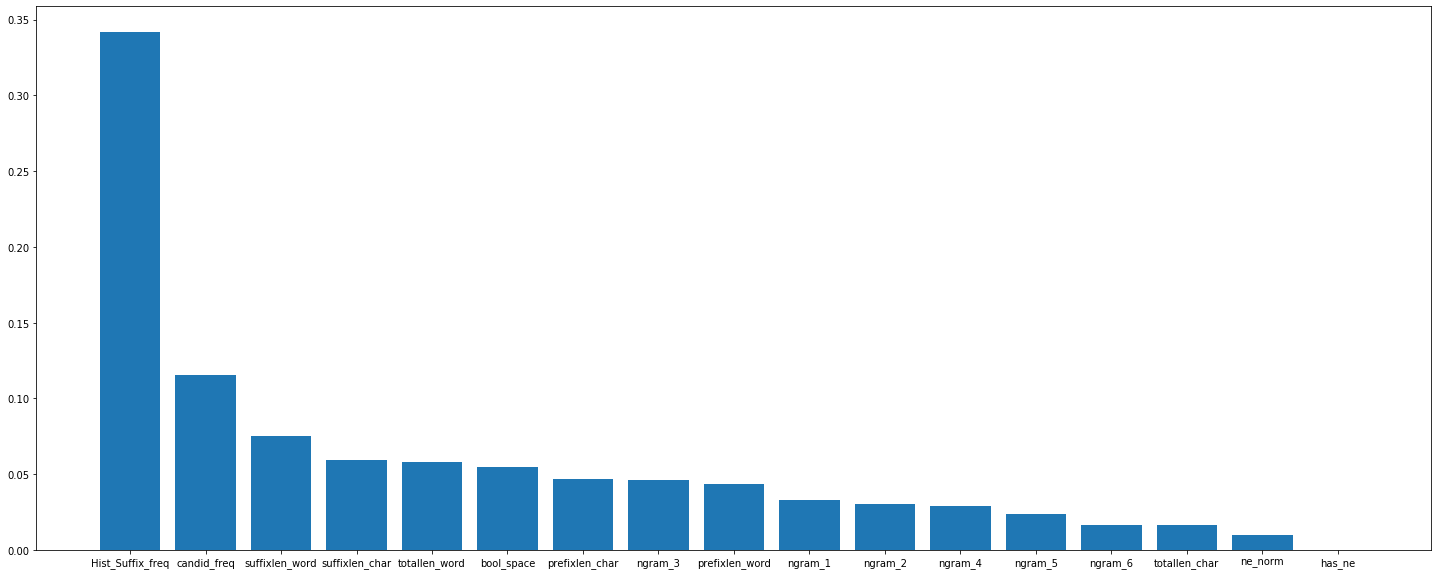

In [4]:
imp = list(feature_imp['Importance'])
var = list(feature_imp['Variable'])

fig, ax = plt.subplots(1, 1, figsize = (25, 10))
plt.bar(var, imp)
plt.show()